# MNIST- handwritten digit recognition
[The MNIST problem](http://yann.lecun.com/exdb/mnist/) is a dataset developed by Yann LeCun, Corinna Cortes and Christopher
Burges for evaluating machine learning models on the handwritten digit classification problem.
The dataset was constructed from a number of scanned document datasets available from the
National Institute of Standards and Technology (NIST). This is where the name for the dataset
comes from, as the Modified NIST or MNIST dataset.
Images of digits were taken from a variety of scanned documents, normalized in size and
centered. This makes it an excellent dataset for evaluating models, allowing the developer to
focus on the machine learning with very little data cleaning or preparation required. Each
image is a 28 × 28 pixel square (784 pixels total).
The dataset below has 60000 images for training and 10000 for testing. Labels are the 10 digits (0-9), therefore it is a multi-class classification problem. Excellent results achieve a prediction error of less than 1%. State-of-the-art prediction
error of approximately 0.2% can be achieved with large Convolutional Neural Networks.

## Loading Data & EDA

In [94]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
K.clear_session()

In [95]:
?mnist

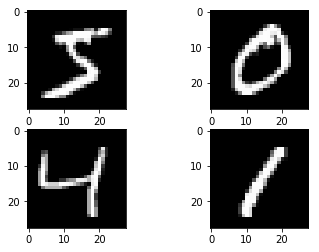

In [96]:
# fix random seed for reproducibility
seed = 123
np.random.seed(seed)
# load (downloaded if needed) the MNIST dataset
#xtnfile = 'C:\MSDS\Deep\wk2\train-images-idx3-ubyte.gz'
#ytnfile = 'C:\MSDS\Deep\wk2\train-labels-idx1-ubyte.gz'
#xtsfile = 'C:\MSDS\Deep\wk2\t10k-images-idx3-ubyte.gz'
#ytsfile = 'C:\MSDS\Deep\wk2\t10k-labels-idx1-ubyte.gz'
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap='gray')
plt.subplot(222)
plt.imshow(X_train[1], cmap='gray') 
plt.subplot(223)
plt.imshow(X_train[2], cmap='gray')
plt.subplot(224)
plt.imshow(X_train[3], cmap='gray')
# show the plot
plt.show()

In [97]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train.max(), X_train.min()) # Note that the pixel value scales 0-255 

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
255 0


## Baseline model using simple neural net
MNIST problem is not terribly difficult that we may get a decent result by using simple neural nets without CNN. We can build a baseline model with a simple neural net and later compare how a CNN model does better that the baseline.

A simple NN talkes 1D input, so we will change the data shape to a 1D vector: a 2D image of 28x28 pixels is reshaped (flattened) to a 1D vector of 784 pixels. Then the pixel values are normalized so that a value is between 0 and 1. Then we make labels (both y_train and y_test) to categorical- which means we make 10 columns with values 0 or 1 instead of 1 column with values 0-9.     


In [98]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras.utils as np_utils

# fix random seed for reproducibility
seed = 123
np.random.seed(seed)
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [99]:


# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [100]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [101]:
### YOUR TURN: 
#   Build a model using Sequential() which has 1 Dense hidden layer and 1 output    
#   For the dense layer, give the number of neurons the same as the number of the input pixels 
# 

# define baseline model
def baseline_model():
    model = Sequential()
    model.add(Dense(784, activation='relu', input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))
    return model

model = baseline_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## Note: I made the output shape 10 to match the shape of y (60000, 10)

In [102]:
# build the model
model = baseline_model()
#   Compile model
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy'])


In [103]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 10s - loss: 0.2800 - acc: 0.9210 - val_loss: 0.1353 - val_acc: 0.9604
Epoch 2/20
 - 9s - loss: 0.1125 - acc: 0.9677 - val_loss: 0.0957 - val_acc: 0.9700
Epoch 3/20
 - 9s - loss: 0.0721 - acc: 0.9792 - val_loss: 0.0762 - val_acc: 0.9764
Epoch 4/20
 - 8s - loss: 0.0510 - acc: 0.9850 - val_loss: 0.0654 - val_acc: 0.9790
Epoch 5/20
 - 9s - loss: 0.0367 - acc: 0.9892 - val_loss: 0.0712 - val_acc: 0.9782
Epoch 6/20
 - 9s - loss: 0.0273 - acc: 0.9922 - val_loss: 0.0572 - val_acc: 0.9818
Epoch 7/20
 - 10s - loss: 0.0204 - acc: 0.9949 - val_loss: 0.0602 - val_acc: 0.9810
Epoch 8/20
 - 9s - loss: 0.0144 - acc: 0.9969 - val_loss: 0.0615 - val_acc: 0.9807
Epoch 9/20
 - 9s - loss: 0.0113 - acc: 0.9976 - val_loss: 0.0603 - val_acc: 0.9819
Epoch 10/20
 - 9s - loss: 0.0088 - acc: 0.9983 - val_loss: 0.0614 - val_acc: 0.9822
Epoch 11/20
 - 9s - loss: 0.0062 - acc: 0.9989 - val_loss: 0.0631 - val_acc: 0.9813
Epoch 12/20
 - 9s - loss: 0.0043 

In [104]:

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.85%


## Simple CNN model
Now we will build a simple CNN model and see if it can do better than our baseline model above (NN without convolution layer).

In [105]:
# Simple CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import keras.utils as np_utils
from keras import backend as K

K.set_image_dim_ordering('tf')
# fix random seed for reproducibility
seed = 123
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [106]:
#### YOUR TURN
# Reshape X_train and X_test to be (n_samples, width, height, channels)
# Then cast the data type of the arrays to type 'float32'
# Hint: the n_channel is 1 in this case. You can use .shape
# Hint: .astype() changes numpy array's data type
num_channel= 1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], num_channel).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], num_channel).astype('float32')


In [107]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [108]:

### YOUR TURN
# Normalize inputs from 0-255 to 0-1
X_train = X_train/255
X_test =  X_test/255

# Encode labels to categorical
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [109]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [110]:

# define a simple CNN model
def simple_cnn_model():
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer
# hint: you need Flatten() before the first dense layer
    model = Sequential()
    model.add (Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                activation='relu', input_shape=(28, 28, 1)))
    model.add (MaxPooling2D(pool_size=(2, 2), strides=None))
    model.add (Flatten())
    model.add(Dense(784, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

model = simple_cnn_model()
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 784)               3613456   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
Total params: 3,622,138
Trainable params: 3,622,138
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model using the same options as above
model = simple_cnn_model()
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy'])

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 90s 1ms/step - loss: 0.1868 - acc: 0.9418 - val_loss: 0.0540 - val_acc: 0.9814
Epoch 2/20
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0512 - acc: 0.9842 - val_loss: 0.0455 - val_acc: 0.9851
Epoch 3/20
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0319 - acc: 0.9902 - val_loss: 0.0444 - val_acc: 0.9857
Epoch 4/20
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0218 - acc: 0.9932 - val_loss: 0.0374 - val_acc: 0.9893
Epoch 5/20
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0154 - acc: 0.9953 - val_loss: 0.0401 - val_acc: 0.9875
Epoch 6/20
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0109 - acc: 0.9967 - val_loss: 0.0351 - val_acc: 0.9902
Epoch 7/20
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0090 - acc: 0.9971 - val_loss: 0.0377 - val_acc

## Two-layer CNN model
Let's stack another convolutional layer.

In [ ]:
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model, load_model
import keras.backend as K
from keras.callbacks import ModelCheckpoint
# YOUR TURN
# Build a 2-conv layer model
# Try this architecture: conv-maxpool-conv-maxpool-dense-dense-output
# Use 32 (5x5) filters for the first conv layer, and use 16 (3x3) filters for the second conv layer
# Use the same max pool as above
# (optional) you can compare with and with out dropout layer after the second maxpool layer
# Usng dropout is a way to regularize your model. Dropout randomly drops some neurons in the feature map.
# By dropping out some units, it effectively makes the model smaller so it helps reducing the overfitting. 
# see https://keras.io/layers/core/#dropout for the use
# Use 1-2 dense layers before the output
def bilayer_model():
    # create model
    model = Sequential()
    model.add (Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                activation='relu', input_shape=(28, 28, 1)))
    model.add (MaxPooling2D(pool_size=(2, 2), strides=None))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add (Flatten())
    model.add(Dense(400, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

model = bilayer_model()
model.summary()



In [ ]:
# build the model
model = bilayer_model()
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200,
verbose=2)


In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

## More convolution layers 

In [ ]:
## YOUR TURN
# Build a model with 4 convolutional layers
# choose your own hyperparameters for conv layers
# choose to include maxpool if you like 
# choose to include dropout if you like
def multilayer_cnn_model():
    model = Sequential()
    model.add (Conv2D(64, kernel_size=(5, 5), strides=(1, 1),
                activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (4, 4), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Conv2D(16, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add (Flatten())
    model.add(Dense(400, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# build the model
model = multilayer_cnn_model()
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy'])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200,
verbose=2)
  

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Discussion:
Give bullet pints summary of what you have found from above experiments.
e.g. 
1. how is a 1-layer ANN vs. 1-layer CNN?
##### The ANN was much faster and performed 10% better than the CNN
2. when the number of layers increases, what happens to the performance?
##### It got worse.
3. what happens if I have very deep CNN? did you face with any problems?
##### Faced the problem with negative dimension size.The accuracy kept getting worse and the model kept taking longer.
4. what can you do to reduce an overfitting problem?
##### Steps for reducing overfitting:
1) Add more data
2) Use data augmentation
3) Use architectures that generalize well
4) Add regularization (mostly dropout, L1/L2 regularization are also possible)
5) Reduce architecture complexity.

